In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
FILE_NAME = "PQ2MON - Orders - Weeks -1 to -109 (1).xls.xlsx"
DF = pd.read_excel(FILE_NAME)
DF

,Client Grouping1,Customer Group,Requested Mode,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Lane ID - City to City,Start Date,Completion Date,Order #,Avg. Weekly Frequency
0,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-04-16,2019-04-18,3790088,0
1,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-05-07,2019-05-09,3810953,0
2,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-06-07,2019-06-10,3841144,0
3,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-07-09,2019-07-11,3869973,0
4,Corporate,3M Canada Company,ROAD,Standard,DRY,PQ2MON,USMWIA,"STE THERESE,PQ/TE to PRAIRIE DU CHIEN,WI/",2020-02-26,2020-03-02,4066936,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23864,Spot,Traffic Tech,ROAD,Standard,DRY,PQ2MON,BC2VAN,"ST LAURENT,PQ/IL to DELTA,BC/",2020-06-18,2020-06-22,4192727,0
23865,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-18,4074001,0
23866,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-20,4073978,0
23867,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-13,2020-02-18,4074019,0


# Visualizing the data

In [4]:
from collections import Counter

def getSortedCounter(my_list,cut_off=5,desc=True,others=True):
    c = dict(sorted(Counter(my_list).items(), key=lambda x: x[1], reverse = desc))
    if cut_off and cut_off < len(c):
        others_cnt = sum(list(c.values())[cut_off:])
        c = dict(list(c.items())[:cut_off])
        if others:
            c["Others"] = others_cnt
    return c

def getSortedCounterDf(df,col,cut_off=5):
    c = getSortedCounter(df[col],cut_off=cut_off)
    df = pd.DataFrame(columns=[col,"count"])
    df[col] = [str(key) for key in c.keys()]
    df["count"] = c.values()
    return df

def sorted_bar_plot(df,col,cut_off=5):
    df_cnt = getSortedCounterDf(df,col,cut_off)
    sns.barplot(data=df_cnt,y=col,x="count")
    plt.show()


def pie_plot(my_list):
    c = getCounter(my_list,desc=True)
    labels = c.keys()
    sizes = [i/len(my_list) for i in c.values()]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,counterclock = False)
    ax1.axis('equal')
    plt.show()
    

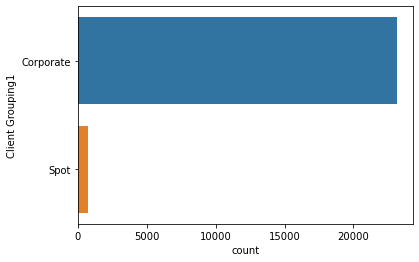

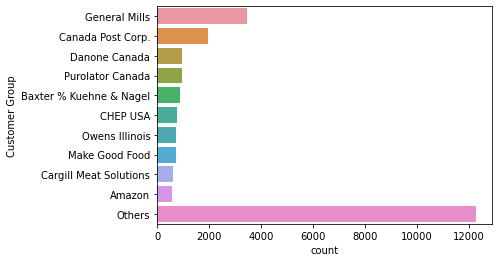

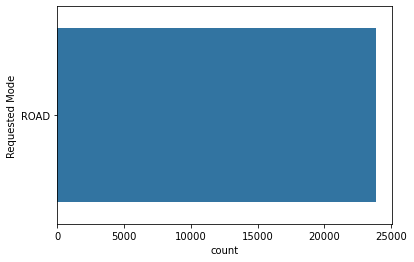

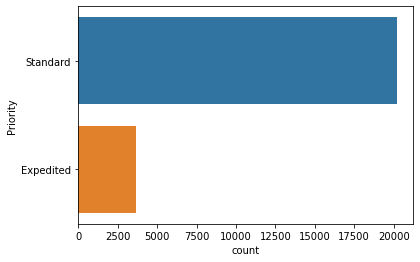

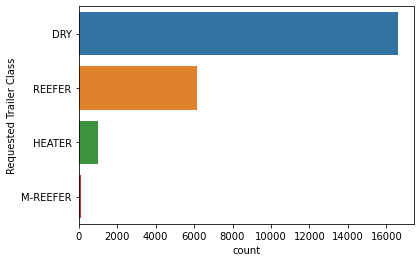

In [34]:
for col in DF.columns[:-7]:
    sorted_bar_plot(DF,col,10)

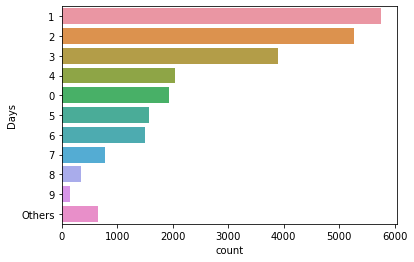

In [6]:
df = DF['Completion Date'] - DF['Start Date']
df = pd.DataFrame([item.days for item in df],columns=["Days"])
sorted_bar_plot(df,"Days",10)

# Preprocessing the Data

In [8]:
## Clean data (only leaving rows with PQ and relevant columns)

In [83]:
DF_PQ = DF[DF['Consignee Region3'].str.contains('PQ') | DF['Shipper Region3'].str.contains('PQ')]
DF_CLEAN = DF_PQ.copy().drop(columns=["Customer Group","Requested Mode","Order #","Avg. Weekly Frequency","Lane ID - City to City","Client Grouping1"])
DF_CLEAN

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
0,Standard,DRY,ON2TOR,PQ2S,2019-04-16,2019-04-18
1,Standard,DRY,ON2TOR,PQ2S,2019-05-07,2019-05-09
2,Standard,DRY,ON2TOR,PQ2S,2019-06-07,2019-06-10
3,Standard,DRY,ON2TOR,PQ2S,2019-07-09,2019-07-11
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02
...,...,...,...,...,...,...
23864,Standard,DRY,PQ2MON,BC2VAN,2020-06-18,2020-06-22
23865,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-18
23866,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-20
23867,Standard,REEFER,PQ2MON,ABNEDM,2020-02-13,2020-02-18


In [10]:
# Calculate imbalance, daily and cumulatively. Imbalance = Inbound - Outbound

In [85]:
df_out = DF_CLEAN[DF_CLEAN['Shipper Region3'].str.contains('PQ')]['Start Date'].value_counts().sort_index(axis=0)
df_in = DF_CLEAN[DF_CLEAN['Consignee Region3'].str.contains('PQ')]['Completion Date'].value_counts().sort_index(axis=0)
df_combine = pd.concat([df_out, df_in],axis=1).fillna(0, downcast='infer').rename(columns={"Start Date": "Outbound", "Completion Date": "Inbound"})
df_combine["Imbalance"] = df_combine["Inbound"] - df_combine["Outbound"]
df_combine["cImbalance"] = df_combine["Imbalance"].cumsum()
df_combine

,Outbound,Inbound,Imbalance,cImbalance
2019-03-13,1,0,-1,-1
2019-03-19,2,0,-2,-3
2019-03-20,2,0,-2,-5
2019-03-21,1,0,-1,-6
2019-03-22,12,0,-12,-18
...,...,...,...,...
2021-04-20,21,20,-1,253
2021-04-21,12,25,13,266
2021-04-22,10,30,20,286
2021-04-23,11,24,13,299


In [86]:
std = df_combine["Imbalance"].std()
mean_imb = df_combine["Imbalance"].mean()
mean_cimb = df_combine["cImbalance"].mean()

In [87]:
std

6.797885381893868

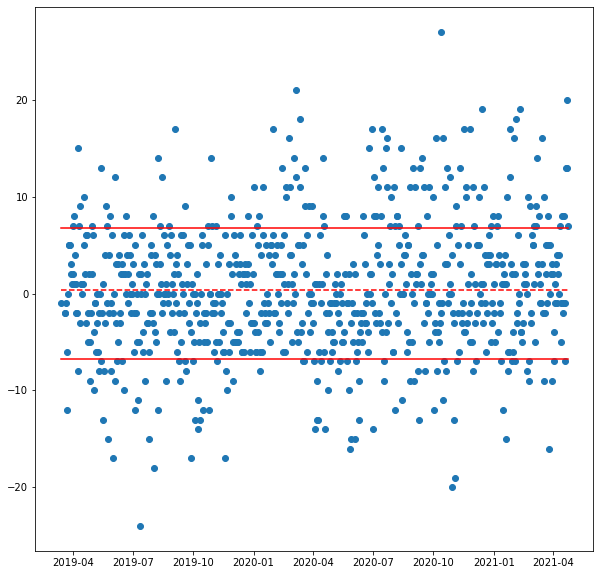

In [88]:
firstDate = min(df_combine.index)
lastDate = max(df_combine.index)
plt.figure(figsize=(10,10))
plt.plot(df_combine.index,df_combine["Imbalance"],'o')
plt.plot([firstDate,lastDate],[mean_imb,mean_imb],'r--')
plt.plot([firstDate,lastDate],[std,std],'r-')
plt.plot([firstDate,lastDate],[-std,-std],'r-')

<AxesSubplot:xlabel='Imbalance', ylabel='Count'>

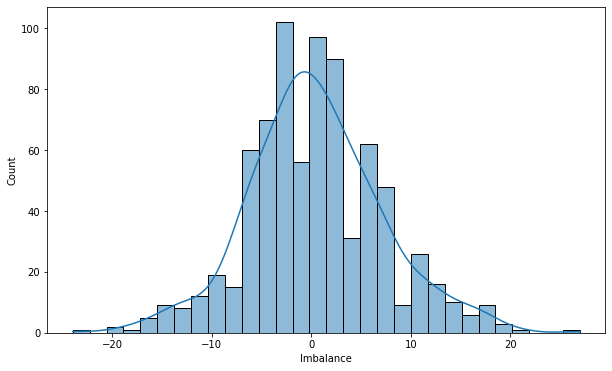

In [89]:
plt.figure(figsize=(10,6))
sns.histplot(x="Imbalance",data=df_combine,kde=True)
# sns.histplot(x="Outbound",data=df_combine,kde=True)


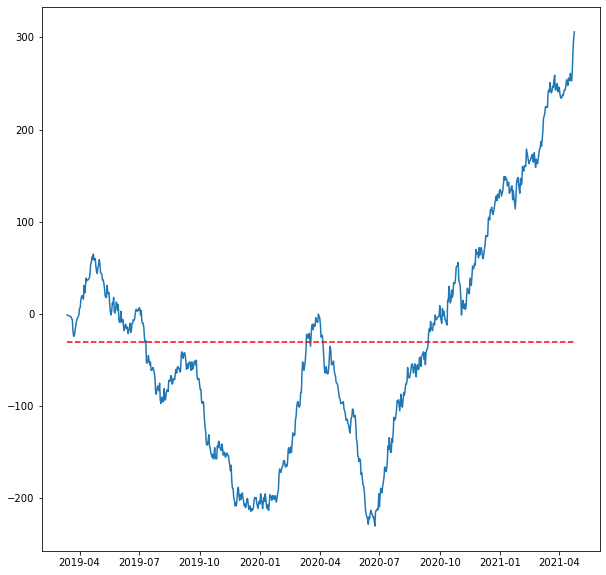

In [90]:
plt.figure(figsize=(10,10))
plt.plot(df_combine["cImbalance"])
plt.plot([firstDate,lastDate],[mean_cimb,mean_cimb],'r--')

## Extracting sample data to work with

In [812]:
MIN_DEF, MAX_DEF = pd.Timedelta(days=0),pd.Timedelta(days=14)
      
# Actually reschedule an order in the scheduling table (by overwriting the date in column col)
# Returns the modified schedule and the updated counts
def move(df_sched,index,to,col='Start Date'):
    df_resched = df_sched.copy()
    df_resched.loc[index,col] = to
    df_recount = get_df_count(df_resched)
    return df_resched, df_recount

# Get the imbalance level of the date
def get_imb(df,date):
    return df.loc[date,"Imbalance"]

# Get all the orders that start and/or completes on a specific day
# 'outer' as or, 'inner' as and
def get_df_day(df,date,col=['Start Date','Completion Date'],how='outer'): 
    cond = False
    if type(col) != list:
        cond = df[col] == date
    elif len(col) == 1:
        cond = df[col[0]] == date
    elif len(col) == 2:
        if how == 'outer':
            cond = (df[col[0]] == date) | (df[col[1]] == date)
        elif how == 'inner':
            cond = (df[col[0]] == date) & (df[col[1]] == date)
    return df[cond].sort_values(col)

# Get the counts for a schedule, such as inbound and out bound figures. Also calculates the imbalance levels
def get_df_count(df):
    df_out = df[df['Shipper Region3'].str.contains('PQ')]['Start Date'].value_counts().sort_index(axis=0)
    df_in = df[df['Consignee Region3'].str.contains('PQ')]['Completion Date'].value_counts().sort_index(axis=0)
    df_count = pd.concat([df_out, df_in],axis=1).fillna(0, downcast='infer').rename(columns={"Start Date": "Outbound", "Completion Date": "Inbound"})
    df_count["Imbalance"] = df_count["Inbound"] - df_count["Outbound"]
    df_count["cImbalance"] = df_count["Imbalance"].cumsum()
    return df_count

# Get all orders that starts and/or completes in a specific time span
def get_df_sched(df,span_start,span_end, how='outer'):
    cond1 = (df["Start Date"] >= span_start) & (df["Start Date"] <= span_end)
    cond2 = (df["Completion Date"] >= span_start) & (df["Completion Date"] <= span_end)
    if how == 'outer': 
        return df[cond1 | cond2]
    elif how == 'inner':
        return df[cond1 & cond2]
    
# Get a number of orders that can be moved to other days
def get_cand_jobs(df,date,col=False,num_jobs=None):
    df_day = get_df_day(df,date)
    del_len = df_day["Completion Date"] - df_day["Start Date"]
    constr = (del_len >= MIN_DEF) & (del_len <= MAX_DEF) # can add more constraints if necessary
    if col == 'Start Date':
        constr = (del_len >= MIN_DEF) & (del_len <= MAX_DEF) & (df_day[col] == date) & (df_day['Shipper Region3'].str.contains('PQ'))
    elif col == 'End Date':
        constr = (del_len >= MIN_DEF) & (del_len <= MAX_DEF) & (df_day[col] == date) & (df_day['Consignee Region3'].str.contains('PQ'))
    res = df_day[constr]
    if num_jobs != None:
        num_jobs = int(min(len(res),num_jobs))
        return res.iloc[:num_jobs,:]
    else: 
        return res

In [790]:
MIN_DEF, MAX_DEF = pd.Timedelta(days=0),pd.Timedelta(days=14)


# Get orders that have the same values in columns in col
# Used mostly to determine the shortest/longest expected time for order of the same type
def get_df_similar_orders(df,index,col=["Priority","Requested Trailer Class","Shipper Region3","Consignee Region3"]):
    order = df.loc[index,col]
    df_dup = df.loc[:,col]
    df_dup = df_dup[df_dup == order].dropna()
    return df.loc[df_dup.index,:]

# Get the Series/Df that tells the expected time of all orders in df
def get_df_time(df):
    return df["Completion Date"] - df["Start Date"]

# Get the tuple of the form (min,max) for the expected order time.
def get_time_range(df,index,adjusted=False):
    df_orders = get_df_similar_orders(df,index)
    df_time = get_df_time(df_orders)
    min_exp, max_exp = min(df_time), max(df_time)
    if not adjusted:
        return min_exp, max_exp
    else: 
        return max(MIN_DEF, min_exp), min(MAX_DEF, max_exp)


# Get the bound (earliest/latest) dates in between which an order have to start and complete.
# By default the assumption would be that the order must start in between 14 days prior to 
# originally scheduled all the way to 0 days before; and must completes within 1 day prior to 1 day after
# originally scheduled.
# Because of this, we based the completion date on the date in the ORIGINAL schedule (i.e DF_CLEAN)
def get_bound_dates(index):
    df = DF_CLEAN
    EARLIEST_S,LATEST_S = pd.Timedelta(days=-14),pd.Timedelta(days=0)
    EARLIEST_C,LATEST_C = pd.Timedelta(days=-1),pd.Timedelta(days=1)
    compl_date = df.loc[index,'Completion Date']
    return compl_date + EARLIEST_S , compl_date + LATEST_S , compl_date + EARLIEST_C , compl_date + LATEST_C

# Checks if an order violates any boundaries, especially after rescheduled
def check_bound_violations(df,index):
    start = df.loc[index,'Start Date'] 
    compl = df.loc[index,'Completion Date']
    es,ls,ec,lc = get_bound_dates(index)
    return not (es <= start and start <= ls and ec <= compl and compl <= lc)

# Get all orders that violate the supposed bound dates. Can be useful in the future if we want to clean up some order
# so that they become consistent
def get_df_bound_violations(df):
    res = []
    for index in df.index:
        if check_bound_violations(df,index):
            res.append(index)
    return df.loc[res]

# Records the changes in days made to the "Start Date" and "Completion Date" of the original schedule
def get_df_sched_diff(df_sched,df_resched):
    df_st_diff = df_resched["Start Date"] - df_sched["Start Date"]
    df_cp_diff = df_resched["Completion Date"] - df_sched["Completion Date"]
    df = pd.concat([df_st_diff,df_cp_diff],axis=1)
    return df[df != pd.Timedelta(days=0)].dropna(how='all').fillna(pd.Timedelta(days=0))


In [791]:
df = get_df_sched_diff(df_sched,df_resched)
df

,Start Date,Completion Date
16,-1 days,0 days
28,-1 days,0 days
44,-1 days,0 days
46,-1 days,0 days
47,-1 days,0 days
...,...,...
23713,-1 days,0 days
23714,-1 days,0 days
23715,-1 days,0 days
23723,-1 days,0 days


In [792]:
startDate = pd.Timestamp(2020,1,1,0)
endDate = pd.Timestamp(2020,1,31,0)

df_sched = get_df_sched(DF_CLEAN,startDate,endDate)
df_count = get_df_count(df_sched)[startDate:endDate]
df_resched = df_sched.copy()
df_recount = df_count.copy()

In [793]:
check_bound_violations(df_resched,22917)

False

In [794]:
get_df_bound_violations(df_sched)

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
10812,Standard,DRY,MB2WIN,PQ2MON,2019-11-22,2020-01-09
15579,Standard,DRY,USWIN,PQ2MON,2020-01-10,2020-01-27
18784,Standard,DRY,PQ2MON,BC2INW,2019-12-18,2020-01-06
21513,Standard,DRY,PQ2MON,ON2S,2019-12-18,2020-01-02
23276,Standard,DRY,PQ2MON,USSCTN,2020-01-21,2020-02-05
23278,Standard,DRY,PQ2MON,USSCTN,2020-01-28,2020-02-12


In [795]:
get_df_bound_violations(df_resched)

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
10812,Standard,DRY,MB2WIN,PQ2MON,2019-11-22,2020-01-09
15579,Standard,DRY,USWIN,PQ2MON,2020-01-10,2020-01-27
18784,Standard,DRY,PQ2MON,BC2INW,2019-12-18,2020-01-06
21513,Standard,DRY,PQ2MON,ON2S,2019-12-18,2020-01-02
23276,Standard,DRY,PQ2MON,USSCTN,2020-01-21,2020-02-05
23278,Standard,DRY,PQ2MON,USSCTN,2020-01-28,2020-02-12


In [796]:
get_bound_dates(10812)

(Timestamp('2019-12-26 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-01-07 00:00:00'),
 Timestamp('2020-01-10 00:00:00'))

## Algorithm

### Pseudo code

<!-- for date in index
    if date.imb == 0: 
        do nothing
    else if date.imb > 0:
        if next.imb > date.imb:
            num_jobs = (next.imb - date.imb)/2
            move num_jobs from next to date
        else:
            num_jobs = (date.imb - next.imb)/2
            move num_jobs from date to next
    else:
        if next.imb < date.imb:
            num_jobs = (date.imb - next.imb)/2
            move num_jobs from date to next
        else:
            num_jobs = (next.imb - date.imb)/2
            move num_jobs from next to date -->

In [797]:
## Version 1.1 - Added EARLIEST and LATEST constraints

In [848]:
startDate = pd.Timestamp(2019,1,1,0)
endDate = pd.Timestamp(2019,12,24,0)
df_sched = get_df_sched(DF_CLEAN,startDate,endDate)
df_count = get_df_count(df_sched)[startDate:endDate]
df_resched = df_sched.copy() # The rescheduled df
df_recount = df_count.copy() # The count df that reflects df_resched
dates = df_recount.index

for i in range(len(dates)-1):
    date = dates[i]
#     print(date,'\n',df_recount,'\n')
#     next_ = date + pd.Timedelta(days=1)
    next_ = dates[i+1]
    date_imb = get_imb(df_recount,date)
    next_imb = get_imb(df_recount,next_)
    
    # 
    if date_imb > 0:
        if date_imb < next_imb: # if there's more truck coming in tomorrow
            num_jobs = int((next_imb - date_imb)/2)
            cand = get_cand_jobs(df_resched,date,'Start Date',num_jobs)
            for index in cand.index:
                es,ls,ec,lc = get_bound_dates(index)
                if es <= next_ and next_ <= ls:
                    df_resched,df_recount = move(df_resched,index,to=next_,col="Start Date")
                    
        elif date_imb > next_imb:
            num_jobs = int((date_imb - next_imb)/2)
            cand = get_cand_jobs(df_resched,next_,'Start Date',num_jobs)
            for index in cand.index:
                es,ls,ec,lc = get_bound_dates(index)
                if es <= date and date <= ls:
                    df_resched,df_recount = move(df_resched,index,to=date,col="Start Date")
                    
    elif date_imb < 0: 
        if date_imb < next_imb: # if there's more truck coming in tomorrow
            num_jobs = int((next_imb - date_imb)/2)
            cand = get_cand_jobs(df_resched,next_,'Completion Date',num_jobs)
            for index in cand.index:
                es,ls,ec,lc = get_bound_dates(index)
                if ec <= date and date <= lc:
                    df_resched,df_recount = move(df_resched,index,to=date,col="Completion Date")
                    
        elif date_imb > next_imb:
            num_jobs = int((date_imb - next_imb)/2)
            cand = get_cand_jobs(df_resched,date,'Completion Date',num_jobs)
            for index in cand.index:
                es,ls,ec,lc = get_bound_dates(index)
                if ec <= next_ and next_ <= lc:
                    df_resched,df_recount = move(df_resched,index,to=next_,col="Completion Date")  

In [799]:
# Side by side comparison with df_count

In [ ]:
get_cand_jobs(df_resched,next_,'Start Date',num_jobs)

In [849]:
df_count1 = df_count[startDate:endDate]
df_recount1 = df_recount[startDate:endDate]
df = pd.concat([df_count1,df_recount1],axis=1)
df.head(50)

,Outbound,Inbound,Imbalance,cImbalance,Outbound,Inbound,Imbalance,cImbalance
2019-03-13,1,0,-1,-1,1,0,-1,-1
2019-03-19,2,0,-2,-3,2,0,-2,-3
2019-03-20,2,0,-2,-5,2,0,-2,-5
2019-03-21,1,0,-1,-6,1,0,-1,-6
2019-03-22,12,0,-12,-18,12,0,-12,-18
2019-03-23,6,0,-6,-24,6,2,-4,-22
2019-03-24,3,3,0,-24,3,4,1,-21
2019-03-25,9,14,5,-19,9,11,2,-19
2019-03-26,13,18,5,-14,13,18,5,-14
2019-03-27,15,20,5,-9,16,20,4,-10


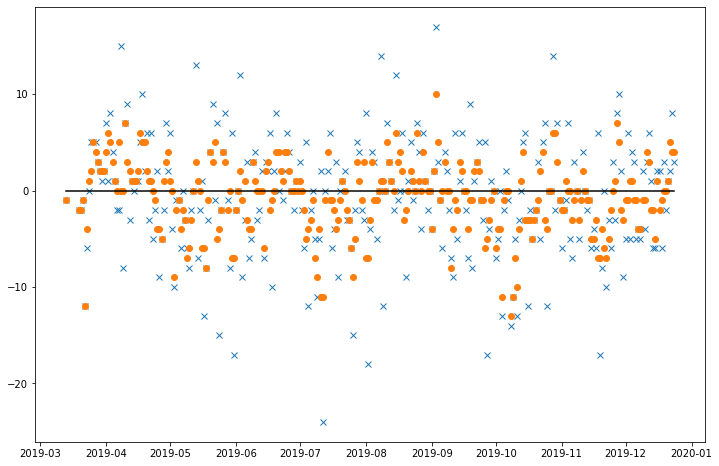

In [851]:
std1 = df_count1["Imbalance"].std()
firstDate = min(df_count1.index)
lastDate = max(df_count1.index)
plt.figure(figsize=(12,8))
plt.plot(df_count1.index,df_count1["Imbalance"],'x')

std2 = df_recount1["Imbalance"].std()
firstDate = min(df_recount1.index)
lastDate = max(df_recount1.index)
plt.plot(df_recount1.index,df_recount1["Imbalance"],'o')
plt.plot([firstDate,lastDate],[0,0],'k-')

In [802]:
print(std1,std2)

6.477687825176477 3.6910279630053506


In [762]:
# We still need to tighten up out constraints

 We have seemingly fixed the problem, but at what cost?
 There can be several violations:
 - By moving Start Date:
     - Backwards (next -> today): Potentially make start date < EARLIEST_S, otherwise okay
     - Forward (today -> next): Potentially violate duration > LATEST_S. Can lead to continuous deferring (keep being put until next day), which can be mildly tolerated
 - By moving Completion Date:
     - Backwards (next -> today): Potentially make completion date < EARLIEST_C or 0, otherwise okay
     - Forward (today -> next): Potentially make completion date  > LATEST_C and/or 0. Can also lead to continuous deferring (keep being put untilthe next day), which is NOT TOLERABLE (MAX=1day). 

How do we set the constraints?
- MIN_DAYS = 0 or the minimum expected value of the same trip in the original schedule, whichever greater
- MAX_DAYS = 14 or the maximum expected value of the same trip in the original schedule, whichever smaller

See how many violates before rescheduling/ after rescheduling
- df_sched

In [763]:
get_df_bound_violations(df_sched)

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
338,Standard,DRY,PQ2MON,ON2TOR,2020-03-12,2020-04-03
1988,Standard,DRY,PQ2MON,ON2TOR,2020-02-10,2020-03-06
3777,Standard,DRY,PQ2MON,USILCH,2020-03-24,2020-04-14
3778,Standard,DRY,PQ2MON,USILCH,2020-03-25,2020-04-14
3805,Standard,DRY,PQ2MON,USILCH,2020-03-24,2020-04-13
7665,Standard,DRY,PQ2MON,ON2TOR,2020-02-04,2020-03-05
7667,Standard,DRY,PQ2MON,ON2TOR,2020-03-03,2020-04-20
7668,Standard,DRY,PQ2MON,ON2TOR,2020-03-11,2020-04-04
7669,Standard,DRY,PQ2MON,ON2TOR,2020-03-17,2020-04-06
9781,Standard,DRY,PQ2S,USMEIS,2020-03-05,2020-03-25


In [764]:
get_df_bound_violations(df_resched)

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
338,Standard,DRY,PQ2MON,ON2TOR,2020-03-12,2020-04-03
1988,Standard,DRY,PQ2MON,ON2TOR,2020-02-10,2020-03-06
3777,Standard,DRY,PQ2MON,USILCH,2020-03-24,2020-04-14
3778,Standard,DRY,PQ2MON,USILCH,2020-03-25,2020-04-14
3805,Standard,DRY,PQ2MON,USILCH,2020-03-24,2020-04-13
7665,Standard,DRY,PQ2MON,ON2TOR,2020-02-04,2020-03-05
7667,Standard,DRY,PQ2MON,ON2TOR,2020-03-03,2020-04-20
7668,Standard,DRY,PQ2MON,ON2TOR,2020-03-11,2020-04-04
7669,Standard,DRY,PQ2MON,ON2TOR,2020-03-17,2020-04-06
9781,Standard,DRY,PQ2S,USMEIS,2020-03-05,2020-03-25


In [765]:
# df_resched

In [803]:
get_df_sched_diff(df_sched,df_resched).value_counts()

Start Date  Completion Date
-1 days     0 days             171
0 days      -1 days             53
1 days      0 days              36
0 days      1 days               5
dtype: int64

In [840]:
df_sched

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
15,Standard,DRY,PQ2OTT,PQ2MON,2019-12-30,2020-01-03
58,Standard,DRY,USMNMI,PQ2S,2020-01-03,2020-01-07
619,Standard,DRY,PQ2MON,USMEON,2020-01-06,2020-01-08
640,Standard,DRY,PQ2MON,USMEON,2020-01-03,2020-01-06
650,Standard,DRY,PQ2MON,USMEON,2020-01-06,2020-01-08
...,...,...,...,...,...,...
22917,Expedited,HEATER,PQ2MON,MB2WIN,2020-01-03,2020-01-05
23268,Standard,DRY,PQ2MON,USSCTN,2019-12-23,2020-01-06
23269,Standard,DRY,PQ2MON,USSCTN,2019-12-27,2020-01-02
23270,Standard,DRY,PQ2MON,USSCTN,2020-01-03,2020-01-08


In [841]:
df_resched

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
15,Standard,DRY,PQ2OTT,PQ2MON,2019-12-30,2020-01-03
58,Standard,DRY,USMNMI,PQ2S,2020-01-03,2020-01-07
619,Standard,DRY,PQ2MON,USMEON,2020-01-06,2020-01-08
640,Standard,DRY,PQ2MON,USMEON,2020-01-02,2020-01-06
650,Standard,DRY,PQ2MON,USMEON,2020-01-06,2020-01-08
...,...,...,...,...,...,...
22917,Expedited,HEATER,PQ2MON,MB2WIN,2020-01-02,2020-01-05
23268,Standard,DRY,PQ2MON,USSCTN,2019-12-23,2020-01-05
23269,Standard,DRY,PQ2MON,USSCTN,2019-12-27,2020-01-02
23270,Standard,DRY,PQ2MON,USSCTN,2020-01-03,2020-01-08


In [819]:
# startDate = pd.Timestamp(2020,1,1,0)
# endDate = pd.Timestamp(2020,3,31,0)
# df_sched = get_df_sched(DF_CLEAN,startDate,endDate)
df_sched = DF_CLEAN
df_count = get_df_count(df_sched)
df_resched = df_sched.copy()
df_recount = df_count.copy()
dates = df_recount.sort_index().index
for i in range(len(dates)):
    date = dates[i]
#     print(date,'\n',df_recount[i:i+10],'\n')
    next_ = dates[i+1]
    date_imb = get_imb(df_recount,date)
    next_imb = get_imb(df_recount,next_)
    if date_imb > 0:
        if date_imb < next_imb: # if there's more truck coming in tomorrow
            num_jobs = int((next_imb - date_imb)/2)
            cand = get_cand_jobs(df_resched,date,'Start Date',num_jobs)
            for index in cand.index:
                es,ls,ec,lc = get_bound_dates(index)
                if es <= next_ and next_ <= ls:
                    df_resched,df_recount = move(df_resched,index,to=next_,col="Start Date")
                    
        elif date_imb > next_imb:
            num_jobs = int((date_imb - next_imb)/2)
            cand = get_cand_jobs(df_resched,next_,'Start Date',num_jobs)
            for index in cand.index:
                es,ls,ec,lc = get_bound_dates(index)
                if es <= date and date <= ls:
                    df_resched,df_recount = move(df_resched,index,to=date,col="Start Date")
                    
    elif date_imb < 0: 
        if date_imb < next_imb: # if there's more truck coming in tomorrow
            num_jobs = int((next_imb - date_imb)/2)
            cand = get_cand_jobs(df_resched,next_,'Completion Date',num_jobs)
            for index in cand.index:
                es,ls,ec,lc = get_bound_dates(index)
                if ec <= date and date <= lc:
                    df_resched,df_recount = move(df_resched,index,to=date,col="Completion Date")
                    
        elif date_imb > next_imb:
            num_jobs = int((date_imb - next_imb)/2)
            cand = get_cand_jobs(df_resched,date,'Completion Date',num_jobs)
            for index in cand.index:
                es,ls,ec,lc = get_bound_dates(index)
                if ec <= next_ and next_ <= lc:
                    df_resched,df_recount = move(df_resched,index,to=next_,col="Completion Date")  

2019-03-13 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-03-13         1        0         -1          -1
2019-03-19         2        0         -2          -3
2019-03-20         2        0         -2          -5
2019-03-21         1        0         -1          -6
2019-03-22        12        0        -12         -18
2019-03-23         6        0         -6         -24
2019-03-24         3        3          0         -24
2019-03-25         9       14          5         -19
2019-03-26        13       18          5         -14
2019-03-27        15       20          5          -9 

2019-03-19 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-03-19         2        0         -2          -3
2019-03-20         2        0         -2          -5
2019-03-21         1        0         -1          -6
2019-03-22        12        0        -12         -18
2019-03-23         6        0         -6         -24
2019-03-24         3        3          0         -24


2019-04-02 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-04-02         7       11          4           7
2019-04-03        11       19          8          15
2019-04-04        15       19          4          19
2019-04-05        21       22          1          20
2019-04-06         8        6         -2          18
2019-04-07         3        1         -2          16
2019-04-08         7       22         15          31
2019-04-09        19       11         -8          23
2019-04-10        18       25          7          30
2019-04-11        16       25          9          39 

2019-04-03 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-04-03        13       19          6          15
2019-04-04        15       19          4          19
2019-04-05        21       22          1          20
2019-04-06         8        6         -2          18
2019-04-07         3        1         -2          16
2019-04-08         7       22         15          31


2019-04-18 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-04-18        20       28          8          54
2019-04-19        12       14          2          56
2019-04-20         4       10          6          62
2019-04-21         4        1         -3          59
2019-04-22        12       18          6          65
2019-04-23        23       18         -5          60
2019-04-24        14       12         -2          58
2019-04-25        12       14          2          60
2019-04-26        23       14         -9          51
2019-04-27        10        5         -5          46 

2019-04-19 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-04-19         9       14          5          56
2019-04-20         4       10          6          62
2019-04-21         4        1         -3          59
2019-04-22        12       18          6          65
2019-04-23        23       18         -5          60
2019-04-24        14       12         -2          58


2019-05-02 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-05-02        16       16          0          55
2019-05-03        21       11        -10          45
2019-05-04         8        7         -1          44
2019-05-05         3        2         -1          43
2019-05-06        24       18         -6          37
2019-05-07        16       16          0          37
2019-05-08        20       17         -3          34
2019-05-09        21       15         -6          28
2019-05-10        29       21         -8          20
2019-05-11         6        4         -2          18 

2019-05-03 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-05-03        21       11        -10          45
2019-05-04         8        7         -1          44
2019-05-05         3        2         -1          43
2019-05-06        24       18         -6          37
2019-05-07        16       16          0          37
2019-05-08        20       17         -3          34


2019-05-17 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-05-17        19       13         -6          10
2019-05-18        11        3         -8           2
2019-05-19         8        5         -3          -1
2019-05-20         4        8          4           3
2019-05-21        21       30          9          12
2019-05-22        25       24         -1          11
2019-05-23        19       26          7          18
2019-05-24        31       16        -15           3
2019-05-25         8        6         -2           1
2019-05-26         1        5          4           5 

2019-05-18 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-05-18        11        3         -8           2
2019-05-19         8        5         -3          -1
2019-05-20         4        8          4           3
2019-05-21        21       30          9          12
2019-05-22        25       24         -1          11
2019-05-23        19       26          7          18


2019-05-31 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-05-31        19       12         -7          -7
2019-06-01         8        6         -2          -9
2019-06-02         2        2          0          -9
2019-06-03        10       22         12           3
2019-06-04        20       11         -9          -6
2019-06-05        17       14         -3          -9
2019-06-06        17       20          3          -6
2019-06-07        21       14         -7         -13
2019-06-08         9        4         -5         -18
2019-06-09         2        5          3         -15 

2019-06-01 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-06-01         8        6         -2          -9
2019-06-02         2        2          0          -9
2019-06-03        10       22         12           3
2019-06-04        20       11         -9          -6
2019-06-05        17       14         -3          -9
2019-06-06        17       20          3          -6


2019-06-15 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-06-15         2        4          2         -18
2019-06-16         2        4          2         -16
2019-06-17        15       21          6         -10
2019-06-18        17        7        -10         -20
2019-06-19        12       14          2         -18
2019-06-20        10       18          8         -10
2019-06-21        19       19          0         -10
2019-06-22         3        7          4          -6
2019-06-23         4        3         -1          -7
2019-06-24         3        5          2          -5 

2019-06-16 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-06-16         2        4          2         -16
2019-06-17        15       21          6         -10
2019-06-18        17        7        -10         -20
2019-06-19        12       14          2         -18
2019-06-20        10       18          8         -10
2019-06-21        19       19          0         -10


2019-07-04 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-07-04        16       17          1           4
2019-07-05        22       10        -12          -8
2019-07-06         7        5         -2         -10
2019-07-07         4        4          0         -10
2019-07-08        20       15         -5         -15
2019-07-09        21       10        -11         -26
2019-07-10        20       15         -5         -31
2019-07-11        14       16          2         -29
2019-07-12        32        8        -24         -53
2019-07-13         4        4          0         -53 

2019-07-05 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-07-05        16       10         -6          -8
2019-07-06         7        5         -2         -10
2019-07-07         4        4          0         -10
2019-07-08        20       15         -5         -15
2019-07-09        21       10        -11         -26
2019-07-10        20       15         -5         -31


2019-07-19 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-07-19        16       12         -4         -61
2019-07-20         4        4          0         -61
2019-07-21         1        2          1         -60
2019-07-22        12       14          2         -58
2019-07-23        13       10         -3         -61
2019-07-24        14       11         -3         -64
2019-07-25        15        9         -6         -70
2019-07-26        23        8        -15         -85
2019-07-27         8        6         -2         -87
2019-07-28         1        6          5         -82 

2019-07-20 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-07-20         4        3         -1         -61
2019-07-21         1        2          1         -60
2019-07-22        12       14          2         -58
2019-07-23        13       10         -3         -61
2019-07-24        14       11         -3         -64
2019-07-25        15        9         -6         -70


2019-08-02 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-08-02        23       16         -7         -93
2019-08-03        10        6         -4         -97
2019-08-04         3        7          4         -93
2019-08-05        15       18          3         -90
2019-08-06        18       13         -5         -95
2019-08-07        16       16          0         -95
2019-08-08         8       22         14         -81
2019-08-09        23       11        -12         -93
2019-08-10         8        8          0         -93
2019-08-11         0        7          7         -86 

2019-08-03 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-08-03        10        6         -4         -97
2019-08-04         3        7          4         -93
2019-08-05        15       18          3         -90
2019-08-06        18       13         -5         -95
2019-08-07        16       16          0         -95
2019-08-08         8       22         14         -81


2019-08-16 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-08-16        11       16          5         -73
2019-08-17         6        6          0         -73
2019-08-18         1        7          6         -67
2019-08-19        19       19          0         -67
2019-08-20        21       12         -9         -76
2019-08-21        18       19          1         -75
2019-08-22        14       19          5         -70
2019-08-23        17       16         -1         -71
2019-08-24         7        7          0         -71
2019-08-25         0        7          7         -64 

2019-08-17 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-08-17         4        6          2         -73
2019-08-18         1        7          6         -67
2019-08-19        19       19          0         -67
2019-08-20        21       12         -9         -76
2019-08-21        18       19          1         -75
2019-08-22        14       19          5         -70


2019-09-03 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-09-03        12       29         17         -44
2019-09-04         9       12          3         -41
2019-09-05        11       10         -1         -42
2019-09-06        17       11         -6         -48
2019-09-07         6       10          4         -44
2019-09-08         2        4          2         -42
2019-09-09        19       17         -2         -44
2019-09-10        21       14         -7         -51
2019-09-11        15        6         -9         -60
2019-09-12        12       18          6         -54 

2019-09-04 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-09-04         2       12         10         -41
2019-09-05        11       10         -1         -42
2019-09-06        17       11         -6         -48
2019-09-07         6       10          4         -44
2019-09-08         2        4          2         -42
2019-09-09        19       17         -2         -44


2019-09-19 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-09-19        14       20          6         -52
2019-09-20        19       11         -8         -60
2019-09-21         4        5          1         -59
2019-09-22         1        4          3         -56
2019-09-23        10       15          5         -51
2019-09-24        15       14         -1         -52
2019-09-25        17       14         -3         -55
2019-09-26        11       16          5         -50
2019-09-27        28       11        -17         -67
2019-09-28         5        1         -4         -71 

2019-09-20 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-09-20        12       11         -1         -60
2019-09-21         4        5          1         -59
2019-09-22         1        4          3         -56
2019-09-23        10       15          5         -51
2019-09-24        15       14         -1         -52
2019-09-25        17       14         -3         -55


2019-10-03 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-10-03        17       15         -2         -82
2019-10-04        27       14        -13         -95
2019-10-05         4        2         -2         -97
2019-10-06         1        3          2         -95
2019-10-07        16       15         -1         -96
2019-10-08        21        7        -14        -110
2019-10-09        23       12        -11        -121
2019-10-10        18       13         -5        -126
2019-10-11        26       13        -13        -139
2019-10-12         6        3         -3        -142 

2019-10-04 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-10-04        27       16        -11         -95
2019-10-05         4        2         -2         -97
2019-10-06         1        3          2         -95
2019-10-07        16       15         -1         -96
2019-10-08        21        7        -14        -110
2019-10-09        23       12        -11        -121


2019-10-22 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-10-22        16       15         -1        -157
2019-10-23        13       18          5        -152
2019-10-24        15       22          7        -145
2019-10-25        27       15        -12        -157
2019-10-26         3        3          0        -157
2019-10-27         3        3          0        -157
2019-10-28         6       20         14        -143
2019-10-29        17       15         -2        -145
2019-10-30         9       16          7        -138
2019-10-31        11       10         -1        -139 

2019-10-23 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-10-23        13       15          2        -152
2019-10-24        15       22          7        -145
2019-10-25        27       15        -12        -157
2019-10-26         3        3          0        -157
2019-10-27         3        3          0        -157
2019-10-28         6       20         14        -143


2019-11-05 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-11-05        15       15          0        -146
2019-11-06        19       12         -7        -153
2019-11-07        11       14          3        -150
2019-11-08        18       18          0        -150
2019-11-09         8        3         -5        -155
2019-11-10         2        2          0        -155
2019-11-11        11       15          4        -151
2019-11-12        16       16          0        -151
2019-11-13        18       16         -2        -153
2019-11-14        18       17         -1        -154 

2019-11-06 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-11-06        19       12         -7        -153
2019-11-07        11       14          3        -150
2019-11-08        18       18          0        -150
2019-11-09         8        3         -5        -155
2019-11-10         2        2          0        -155
2019-11-11        11       15          4        -151


2019-11-19 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-11-19        16        9         -7        -181
2019-11-20        18       10         -8        -189
2019-11-21        19       19          0        -189
2019-11-22        28       18        -10        -199
2019-11-23         9        6         -3        -202
2019-11-24         8        2         -6        -208
2019-11-25        15       18          3        -205
2019-11-26        20       17         -3        -208
2019-11-27        11       19          8        -200
2019-11-28        12       22         10        -190 

2019-11-20 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-11-20        18       10         -8        -189
2019-11-21        19       19          0        -189
2019-11-22        28       18        -10        -199
2019-11-23         9        6         -3        -202
2019-11-24         8        2         -6        -208
2019-11-25        15       18          3        -205


2019-12-04 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-12-04        17       18          1        -197
2019-12-05        17       20          3        -194
2019-12-06        18       13         -5        -199
2019-12-07        10        6         -4        -203
2019-12-08         8        3         -5        -208
2019-12-09        16       18          2        -206
2019-12-10        23       19         -4        -210
2019-12-11        17       20          3        -207
2019-12-12        14       20          6        -201
2019-12-13        25       26          1        -200 

2019-12-05 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-12-05        17       20          3        -194
2019-12-06        18       13         -5        -199
2019-12-07        10        6         -4        -203
2019-12-08         8        3         -5        -208
2019-12-09        16       18          2        -206
2019-12-10        23       19         -4        -210


2019-12-19 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-12-19        18       20          2        -211
2019-12-20        26       24         -2        -213
2019-12-21         4        5          1        -212
2019-12-22         4        6          2        -210
2019-12-23        12       20          8        -202
2019-12-24         6        9          3        -199
2019-12-25         1        0         -1        -200
2019-12-26         4        5          1        -199
2019-12-27        24       18         -6        -205
2019-12-28         4        1         -3        -208 

2019-12-20 00:00:00 
             Outbound  Inbound  Imbalance  cImbalance
2019-12-20        24       24          0        -213
2019-12-21         4        5          1        -212
2019-12-22         4        6          2        -210
2019-12-23        12       20          8        -202
2019-12-24         6        9          3        -199
2019-12-25         1        0         -1        -200


KeyError: Timestamp('2019-12-25 00:00:00')

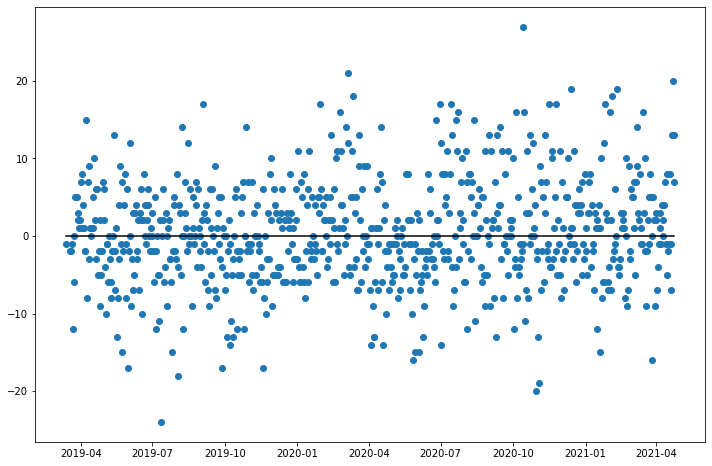

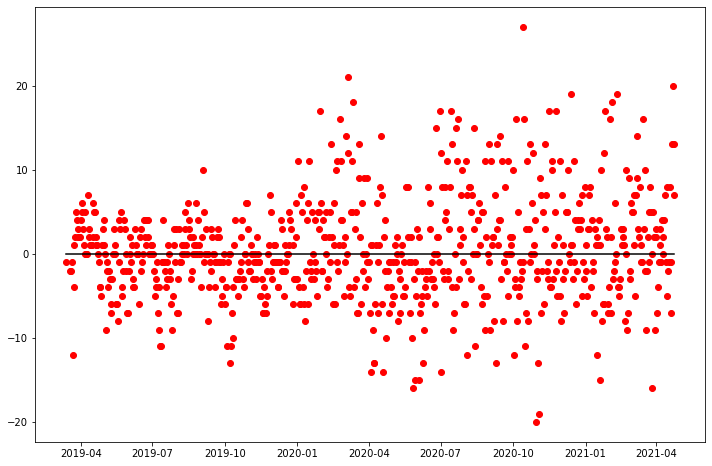

In [829]:
plt.figure(figsize=(12,8))

std1 = df_count["Imbalance"].std()
firstDate = min(df_count.index)
lastDate = max(df_count.index)
plt.plot(df_count.index,df_count["Imbalance"],'o')
plt.plot([firstDate,lastDate],[0,0],'k-')
plt.show()

plt.figure(figsize=(12,8))

std2 = df_recount["Imbalance"].std()
firstDate = min(df_recount.index)
lastDate = max(df_recount.index)
plt.plot(df_recount.index,df_recount["Imbalance"],'ro')
plt.plot([firstDate,lastDate],[0,0],'k-')
plt.show()





In [821]:
df_count

,Outbound,Inbound,Imbalance,cImbalance
2019-03-13,1,0,-1,-1
2019-03-19,2,0,-2,-3
2019-03-20,2,0,-2,-5
2019-03-21,1,0,-1,-6
2019-03-22,12,0,-12,-18
...,...,...,...,...
2021-04-20,21,20,-1,253
2021-04-21,12,25,13,266
2021-04-22,10,30,20,286
2021-04-23,11,24,13,299


In [817]:
df_count.index

DatetimeIndex(['2019-03-13', '2019-03-19', '2019-03-20', '2019-03-21',
               '2019-03-22', '2019-03-23', '2019-03-24', '2019-03-25',
               '2019-03-26', '2019-03-27',
               ...
               '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18',
               '2021-04-19', '2021-04-20', '2021-04-21', '2021-04-22',
               '2021-04-23', '2021-04-24'],
              dtype='datetime64[ns]', length=769, freq=None)

In [815]:
df = DF_CLEAN
df_out = df[df['Shipper Region3'].str.contains('PQ')]['Start Date'].value_counts().sort_index(axis=0)
df_in = df[df['Consignee Region3'].str.contains('PQ')]['Completion Date'].value_counts().sort_index(axis=0)
df_count = pd.concat([df_out, df_in],axis=1).fillna(0, downcast='infer').rename(columns={"Start Date": "Outbound", "Completion Date": "Inbound"})
# df_count["Imbalance"] = df_count["Inbound"] - df_count["Outbound"]
# df_count["cImbalance"] = df_count["Imbalance"].cumsum()
df_count

,Outbound,Inbound
2019-03-13,1,0
2019-03-19,2,0
2019-03-20,2,0
2019-03-21,1,0
2019-03-22,12,0
...,...,...
2021-04-20,21,20
2021-04-21,12,25
2021-04-22,10,30
2021-04-23,11,24


In [830]:
df_count

,Outbound,Inbound,Imbalance,cImbalance
2019-03-13,1,0,-1,-1
2019-03-19,2,0,-2,-3
2019-03-20,2,0,-2,-5
2019-03-21,1,0,-1,-6
2019-03-22,12,0,-12,-18
...,...,...,...,...
2021-04-20,21,20,-1,253
2021-04-21,12,25,13,266
2021-04-22,10,30,20,286
2021-04-23,11,24,13,299


In [835]:
MIN,MAX = min(df_count.index),max(df_count.index) 
dates = [MIN + pd.Timedelta(days=i) for i in range((MAX-MIN).days)]
dates

## Draft / Deprecated codes

In [615]:
startDate = pd.Timestamp(2020,1,1,0)
endDate = pd.Timestamp(2020,1,10,0)
df_sched = get_df_sched(DF_CLEAN,startDate,endDate)
df_count = get_df_count(df_sched)[startDate:endDate]
df_resched = df_sched.copy()
df_recount = df_count.copy()
dates = df_recount.index
for i in range(len(dates)):
    date = dates[i]
#     print(date,'\n',df_recount[startDate:endDate],'\n')
    next_ = date + pd.Timedelta(days=1)
    date_imb = get_imb(df_recount,date)
    next_imb = get_imb(df_recount,next_)
    if date_imb > 0:
        if date_imb < next_imb: # if there's more truck coming in tomorrow
            num_jobs = int((next_imb - date_imb)/2)
            cand = get_cand_jobs(df_resched,date,'Start Date',num_jobs)
            for index in cand.index:
                df_resched,df_recount = move(df_resched,index,to=next_,col="Start Date")
        elif date_imb > next_imb:
            num_jobs = int((date_imb - next_imb)/2)
            cand = get_cand_jobs(df_resched,next_,'Start Date',num_jobs)
            for index in cand.index:
                df_resched,df_recount = move(df_resched,index,to=date,col="Start Date")
    elif date_imb < 0:
        if date_imb < next_imb: # if there's more truck coming in tomorrow
            num_jobs = int((next_imb - date_imb)/2)
            cand = get_cand_jobs(df_resched,next_,'Completion Date',num_jobs)
            for index in cand.index:
                df_resched,df_recount = move(df_resched,index,to=date,col="Completion Date")
        elif date_imb > next_imb:
            num_jobs = int((date_imb - next_imb)/2)
            cand = get_cand_jobs(df_resched,date,'Completion Date',num_jobs)
            for index in cand.index:
                df_resched,df_recount = move(df_resched,index,to=next_,col="Completion Date")        
            

In [605]:
cond_ship = df_resched['Shipper Region3'].str.contains('PQ') & (df_resched["Start Date"] >= startDate) & (df_resched["Start Date"] <= endDate)
cond_cons = df_resched['Consignee Region3'].str.contains('PQ') & (df_resched["Completion Date"] >= startDate) & (df_resched["Completion Date"] <= endDate)
print("Outbound",df_resched[cond_ship]['Shipper Region3'].value_counts().sum())
print("Inbound",df_resched[cond_cons]['Consignee Region3'].value_counts().sum())
print(df_recount.sum())

Outbound 72
Inbound 76
Outbound       72
Inbound        76
Imbalance       4
cImbalance   -173
dtype: int64


In [460]:
date = dates[1]
get_df_count(get_df_day(df_resched,date))
date_imb = get_imb(df_recount,date)
next_ = date + pd.Timedelta(days=1)
next_imb = get_imb(df_recount,next_)

num_jobs = int((date_imb - next_imb)/2)
cand = get_cand_jobs(df_resched,next_,'Start Date',num_jobs)
for index in cand.index:
    df_resched,df_recount = move(df_resched,index,to=date,col="Start Date")

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
1348,Standard,REEFER,ON2TOR,PQ2MON,2020-01-03,2020-01-03
1349,Standard,REEFER,ON2TOR,PQ2MON,2020-01-03,2020-01-03
13827,Expedited,DRY,ON2TOR,PQ2MON,2020-01-03,2020-01-03
17498,Expedited,DRY,PQ2MON,MB2WIN,2020-01-03,2020-01-04
19250,Expedited,DRY,PQ2MON,ON2TOR,2020-01-03,2020-01-04
11437,Standard,HEATER,USEANW,PQ2MON,2020-01-03,2020-01-05


In [196]:
cond1 = df_sched["Consignee Region3"].str.contains('PQ') & (df_sched["Completion Date"] >= startDate) & (df_sched["Completion Date"] <= endDate)
cond2 = df_sched["Shipper Region3"].str.contains('PQ') & (df_sched["Start Date"] >= startDate) & (df_sched["Start Date"] <= endDate)
df1 = df_sched[cond2]["Start Date"].value_counts().sort_index()
cond3 = df_resched["Consignee Region3"].str.contains('PQ') & (df_resched["Completion Date"] >= startDate) & (df_resched["Completion Date"] <= endDate)
cond4 = df_resched["Shipper Region3"].str.contains('PQ') & (df_resched["Start Date"] >= startDate) & (df_resched["Start Date"] <= endDate)
df2 = df_resched[cond4]["Start Date"].value_counts().sort_index()
df3 = pd.concat([df1,df2],axis=1)
df3.loc["Total",:] = df3.sum(numeric_only=True,axis=0)
df3

,Start Date,Start Date
2020-01-01 00:00:00,3.0,3.0
2020-01-02 00:00:00,6.0,5.0
2020-01-03 00:00:00,18.0,15.0
2020-01-04 00:00:00,7.0,17.0
2020-01-05 00:00:00,7.0,4.0
2020-01-06 00:00:00,17.0,16.0
2020-01-07 00:00:00,14.0,14.0
2020-01-08 00:00:00,15.0,14.0
2020-01-09 00:00:00,12.0,13.0
2020-01-10 00:00:00,22.0,20.0


In [177]:
date=pd.Timestamp(2019,1,1,0)
df_move = move(df_cand,662,date,'Completion Date')
df_move

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
662,Standard,DRY,PQ2MON,USMEON,2020-01-01,2019-01-01
855,Standard,DRY,SK2SAS,PQ2MON,2020-01-02,2020-01-02
1336,Standard,REEFER,ON2TOR,PQ2MON,2020-01-02,2020-01-02
1337,Standard,REEFER,ON2TOR,PQ2MON,2020-01-02,2020-01-02
1340,Standard,REEFER,ON2TOR,PQ2MON,2020-01-02,2020-01-02
1341,Standard,REEFER,ON2TOR,PQ2MON,2020-01-02,2020-01-02
1342,Standard,REEFER,ON2TOR,PQ2MON,2020-01-02,2020-01-02
1343,Standard,REEFER,ON2TOR,PQ2MON,2019-12-31,2020-01-02
1344,Standard,REEFER,ON2TOR,PQ2MON,2019-12-31,2020-01-02
1345,Standard,REEFER,ON2TOR,PQ2MON,2019-12-31,2020-01-02


In [22]:
REGIONS = ['PQ2MON','PQ2N','PQ2OTT','PQ2QUE','PQ2S','PQ2C']
DF_CLEAN = DF.copy()
for i in range(len(DF_CLEAN)):
    DF_CLEAN.loc[i,"PQ"] = (DF_CLEAN.loc[i,"Shipper Region3"] in REGIONS) or (DF_CLEAN.loc[i,"Consignee Region3"] in REGIONS)

DF_CLEAN = DF_CLEAN[DF_CLEAN["PQ"]==True].drop(columns=["PQ","Customer Group","Requested Mode","Order #","Avg. Weekly Frequency","Lane ID - City to City","Client Grouping1"])
DF_CLEAN

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
0,Standard,DRY,ON2TOR,PQ2S,2019-04-16,2019-04-18
1,Standard,DRY,ON2TOR,PQ2S,2019-05-07,2019-05-09
2,Standard,DRY,ON2TOR,PQ2S,2019-06-07,2019-06-10
3,Standard,DRY,ON2TOR,PQ2S,2019-07-09,2019-07-11
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02
...,...,...,...,...,...,...
23864,Standard,DRY,PQ2MON,BC2VAN,2020-06-18,2020-06-22
23865,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-18
23866,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-20
23867,Standard,REEFER,PQ2MON,ABNEDM,2020-02-13,2020-02-18


In [23]:
df_time = DF_CLEAN[DF_CLEAN['Completion Date'] < pd.Timestamp(2019,4,1,0)].sort_values(by='Start Date')
df_time

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
15076,Standard,DRY,USSES,PQ2MON,2019-01-31,2019-03-25
15077,Standard,DRY,USSES,PQ2MON,2019-02-04,2019-03-24
6850,Standard,DRY,ON2TOR,PQ2MON,2019-03-13,2019-03-26
3592,Standard,DRY,USSEN,PQ2MON,2019-03-19,2019-03-25
19618,Standard,REEFER,PQ2MON,BC2VAN,2019-03-19,2019-03-24
...,...,...,...,...,...,...
18663,Standard,REEFER,PQ2MON,ON2TOR,2019-03-29,2019-03-30
22913,Expedited,HEATER,PQ2MON,MB2WIN,2019-03-29,2019-03-31
2213,Expedited,DRY,ABSCAL,PQ2MON,2019-03-29,2019-03-31
7943,Standard,REEFER,PQ2MON,ON2TOR,2019-03-30,2019-03-31


In [24]:
df_time["Start Date"].value_counts()

2019-03-26    29
2019-03-25    28
2019-03-27    25
2019-03-22    21
2019-03-28    17
2019-03-24     9
2019-03-29     9
2019-03-23     7
2019-03-21     6
2019-03-19     5
2019-03-20     4
2019-03-30     2
2019-01-31     1
2019-03-13     1
2019-02-04     1
Name: Start Date, dtype: int64

In [25]:
df_time["Completion Date"].value_counts()

2019-03-28    32
2019-03-27    31
2019-03-29    25
2019-03-26    24
2019-03-25    23
2019-03-30    13
2019-03-31    10
2019-03-24     7
Name: Completion Date, dtype: int64

In [26]:
df = DF_CLEAN.copy()
date = pd.Timestamp(2019,3,27,0)
cond1 = df.loc[:,"Start Date"] == date
cond2 = df.loc[:,"Completion Date"] == date
df = df.where(cond2).append(df_time.where(cond1)).drop_duplicates(keep='first').dropna()
df

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
655,Standard,DRY,PQ2MON,USMEON,2019-03-25,2019-03-27
2209,Expedited,DRY,ABSCAL,PQ2MON,2019-03-25,2019-03-27
3040,Standard,REEFER,ABSRUR,PQ2MON,2019-03-23,2019-03-27
3126,Standard,REEFER,ON2S,PQ2MON,2019-03-25,2019-03-27
3130,Standard,REEFER,ON2S,PQ2MON,2019-03-26,2019-03-27
3151,Standard,REEFER,ON2TOR,PQ2MON,2019-03-26,2019-03-27
3353,Standard,REEFER,ON2TOR,PQ2MON,2019-03-25,2019-03-27
4266,Standard,REEFER,PQ2MON,ON2TOR,2019-03-26,2019-03-27
5883,Standard,DRY,ON2TOR,PQ2MON,2019-03-26,2019-03-27
7770,Standard,DRY,USMWIA,PQ2MON,2019-03-25,2019-03-27


In [27]:
out_degree = pd.DataFrame(data = Counter(df["Shipper Region3"]).items(),columns=["Point","Out Degrees"])
in_degree = pd.DataFrame(data = Counter(df["Consignee Region3"]).items(),columns=["Point","In Degrees"])
df_degree = out_degree.merge(in_degree,how="outer",sort=True).fillna(0).set_index("Point")
df_degree.loc['Total']= df_degree.sum(numeric_only=True, axis=0)
df_degree['Difference']= df_degree['In Degrees'] - df_degree['Out Degrees']
df_degree.drop(["In Degrees","Out Degrees"],axis=1,inplace=True)
df_degree

,Difference
Point,
ABNEDM,2.0
ABSCAL,1.0
ABSRUR,-1.0
BC2VAN,1.0
MB2WIN,0.0
ON2S,-3.0
ON2TOR,-4.0
PQ2MON,7.0
PQ2S,0.0


In [28]:
# date = pd.Timestamp(2019,3,27,0)
df_res = pd.DataFrame()
for date in set(DF_CLEAN["Start Date"]) | set(DF_CLEAN["Completion Date"]):
    df_0 = DF_CLEAN.copy()
    df_1a = df_0[df_0["Start Date"]==date]
    df_1b = df_0[df_0["Completion Date"]==date]
    df_1 = pd.concat([df_1a,df_1b]).drop_duplicates(keep='first').dropna()
    df_2a = pd.concat([df_1["Shipper Region3"].value_counts(),df_1["Consignee Region3"].value_counts()],axis=1).fillna(0)
    df_2a[date] = df_2a["Shipper Region3"]-df_2a["Consignee Region3"]
    df_2 = df_2a.drop(["Shipper Region3","Consignee Region3"],axis=1)
    df_res = pd.concat([df_res,df_2],axis=1)
    
df_res = df_res.fillna(0).T
df_res = df_res.sort_index(axis = 0).sort_index(axis = 1)
df_res["Total"] = df_res.sum(numeric_only=True, axis=1)
df_res


,ABNE,ABNEDM,ABNI,ABNW,ABSCAL,ABSRUR,ATLCML,BC2INE,BC2INW,BC2ISL,...,USSEN,USSES,USSWCC,USSWCN,USSWCS,USWIGR,USWIN,USWIS,USWIW,Total
2019-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20,0.0,-1.0,-1.0,0.0,-3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,2.0,1.0,-1.0,1.0,0.0
2021-04-21,0.0,-1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2021-04-22,0.0,-1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0
2021-04-23,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:title={'center':'Daily Imbalance'}, ylabel='PQ2MON'>

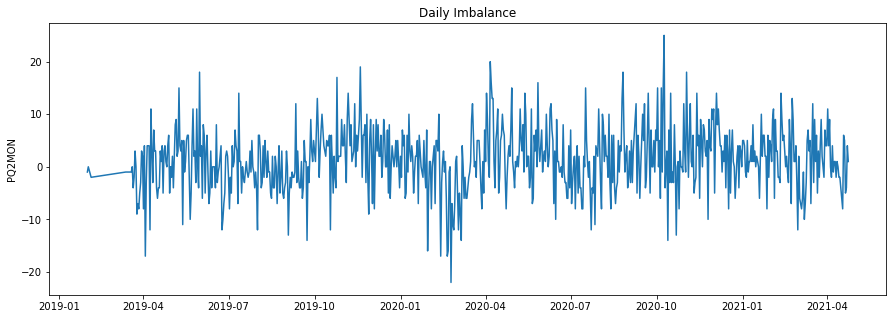

In [29]:
df_0 = df_res.loc[:,"PQ2MON"]
plt.figure(figsize=(15,5))
plt.title("Daily Imbalance")
sns.lineplot(data=df_0,)

In [30]:
df_0 = df_res
df_1 = df_0.copy()
for i in range(len(df_0)):
    df_1.iloc[i,:] = df_0.iloc[:i+1,:].sum(numeric_only=True, axis=0)

df_1

,ABNE,ABNEDM,ABNI,ABNW,ABSCAL,ABSRUR,ATLCML,BC2INE,BC2INW,BC2ISL,...,USSEN,USSES,USSWCC,USSWCN,USSWCS,USWIGR,USWIN,USWIS,USWIW,Total
2019-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20,-22.0,-1201.0,20.0,-16.0,-1490.0,329.0,-66.0,-2.0,-224.0,-36.0,...,96.0,175.0,52.0,10.0,655.0,800.0,31.0,47.0,5.0,0.0
2021-04-21,-22.0,-1202.0,20.0,-16.0,-1491.0,330.0,-66.0,-2.0,-224.0,-36.0,...,96.0,176.0,52.0,10.0,657.0,800.0,31.0,47.0,5.0,0.0
2021-04-22,-22.0,-1203.0,20.0,-16.0,-1489.0,332.0,-66.0,-2.0,-224.0,-36.0,...,96.0,177.0,52.0,10.0,658.0,800.0,32.0,46.0,5.0,0.0
2021-04-23,-22.0,-1202.0,20.0,-16.0,-1490.0,332.0,-66.0,-2.0,-224.0,-36.0,...,96.0,176.0,52.0,10.0,658.0,800.0,32.0,46.0,6.0,0.0


<AxesSubplot:title={'center':'Cumulative Imbalance'}, ylabel='PQ2MON'>

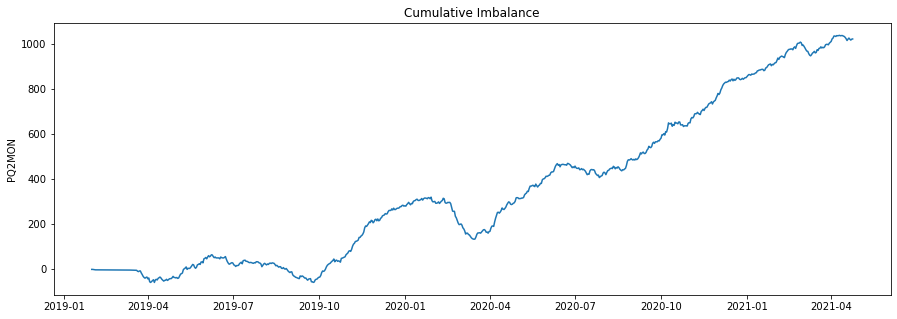

In [31]:
df_2 = df_1.loc[:,"PQ2MON"]
plt.figure(figsize=(15,5))
plt.title("Cumulative Imbalance")
sns.lineplot(data=df_2)

In [32]:
# firstDate = min(df_combine.index)
# lastDate = max(df_combine.index)
# df_combine["Day #"] = [(date - startDate).days for date in df_combine.index]
# df_combine

In [33]:
start_dates = dict(sorted(Counter(DF['Start Date']).items(), key=lambda x: x[0]))
start_dates

completion_dates = dict(sorted(Counter(DF['Completion Date']).items(), key=lambda x: x[0]))
completion_dates

deltas = dict()
keys = set(start_dates.keys()) | set(completion_dates.keys())
for key in keys:
    cnt1 = 0 if key not in start_dates.keys() else start_dates[key]
    cnt2 = 0 if key not in completion_dates.keys() else completion_dates[key]
    deltas[key] = cnt2 - cnt1

deltas = dict(sorted(deltas.items(), key=lambda x: x[0]))
deltas

{Timestamp('2019-01-31 00:00:00'): -1,
 Timestamp('2019-02-01 00:00:00'): -1,
 Timestamp('2019-02-04 00:00:00'): -3,
 Timestamp('2019-03-13 00:00:00'): -2,
 Timestamp('2019-03-19 00:00:00'): -5,
 Timestamp('2019-03-20 00:00:00'): -4,
 Timestamp('2019-03-21 00:00:00'): -8,
 Timestamp('2019-03-22 00:00:00'): -21,
 Timestamp('2019-03-23 00:00:00'): -9,
 Timestamp('2019-03-24 00:00:00'): -1,
 Timestamp('2019-03-25 00:00:00'): -8,
 Timestamp('2019-03-26 00:00:00'): -7,
 Timestamp('2019-03-27 00:00:00'): -3,
 Timestamp('2019-03-28 00:00:00'): 1,
 Timestamp('2019-03-29 00:00:00'): -6,
 Timestamp('2019-03-30 00:00:00'): 3,
 Timestamp('2019-03-31 00:00:00'): 7,
 Timestamp('2019-04-01 00:00:00'): -1,
 Timestamp('2019-04-02 00:00:00'): 1,
 Timestamp('2019-04-03 00:00:00'): -3,
 Timestamp('2019-04-04 00:00:00'): -12,
 Timestamp('2019-04-05 00:00:00'): 2,
 Timestamp('2019-04-06 00:00:00'): 2,
 Timestamp('2019-04-07 00:00:00'): 0,
 Timestamp('2019-04-08 00:00:00'): 14,
 Timestamp('2019-04-09 00:00:0